### Try model,multiple experiments algorithms

In [101]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [102]:
# Load heart dataset
heart_df =pd.read_csv('../Datasets/heart.csv')


In [103]:
print(heart_df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [104]:
x = heart_df.drop('MaxHR', axis=1)
y = heart_df['RestingBP']

In [ ]:
#Drop non-numeric columns
x = x.select_dtypes(include=[np.number])
# standardize Features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode Gender 
#x["sex"] = LabelEncoder().fit_transform(x["sex"])

# Standardizeq

x = pd.get_dummies(x, drop_first=True)  # one-hot encoding
x_scaled = scaler.fit_transform(x)


In [106]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [107]:
# Train the model
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
# Evaluate the model
y_pred = model.predict(x_test)

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7119565217391305
Classification Report:
               precision    recall  f1-score   support

          80       0.00      0.00      0.00         1
          92       0.00      0.00      0.00         1
          95       1.00      0.50      0.67         4
          96       0.00      0.00      0.00         1
         100       0.40      0.50      0.44         4
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         2
         106       0.00      0.00      0.00         2
         108       0.50      0.33      0.40         3
         110       0.55      1.00      0.71        11
         112       1.00      1.00      1.00         2
         115       0.50      0.75      0.60         4
         116       0.00      0.00      0.00         2
         117       0.00      0.00      0.00         1
         118       1.00      0.25      0.40         4
         120       0.90      1.00      0.95        28
         122       0.50     

e:\HeartRiskDector-AI\HeartRiskDetector-AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\HeartRiskDector-AI\HeartRiskDetector-AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\HeartRiskDector-AI\HeartRiskDetector-AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

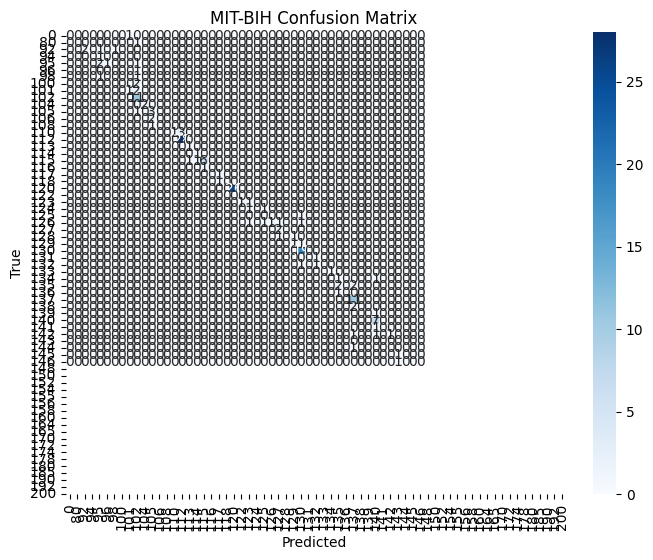

In [111]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("MIT-BIH Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [114]:
# Save model 
joblib.dump(model, '../models/mitbih_rf_model.pkl')

#Load model later
model = joblib.load("../models/mitbih_rf_model.pkl")



### Second datasets model train and experiment

In [115]:
# Datasets load
mitbih_df = pd.read_csv('../Datasets/mitbih_test.csv',header=None)

In [116]:
# Datasets shape and head
print("Dataset shape:", mitbih_df.shape)
print("First 5 rows:\n", mitbih_df.head())

Dataset shape: (21892, 188)
First 5 rows:
         0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0